In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



Attributes related with eating habits are:
Frequent consumption of high caloric food (FAVC), \\

Frequency of consumption of vegetables (FCVC), \\

Number of main meals (NCP), \\

Consumption of food between meals (CAEC), \\

Consumption of water daily (CH20), \\

and Consumption of alcohol (CALC). \\

Attributes related with the physical condition are: \\
Calories consumption monitoring (SCC), \\

Physical activity frequency (FAF), \\

Time using technology devices (TUE), \\

Transportation used (MTRANS), \\



In [ ]:
df_ml = pd.read_csv('/content/drive/MyDrive/NUS/2022 2023 Sem 2/ST4248 Term Paper/Dataset/ObesityDataSetUCI.csv')

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

## Preprocessing

In [ ]:
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
for col in categorical_columns:
    print(f"{col}:")
    print(df_ml[col].value_counts())
    print()

Gender:
Male      1068
Female    1043
Name: Gender, dtype: int64

family_history_with_overweight:
yes    1726
no      385
Name: family_history_with_overweight, dtype: int64

FAVC:
yes    1866
no      245
Name: FAVC, dtype: int64

CAEC:
Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64

SMOKE:
no     2067
yes      44
Name: SMOKE, dtype: int64

SCC:
no     2015
yes      96
Name: SCC, dtype: int64

CALC:
Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

MTRANS:
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

NObeyesdad:
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64



1) combine all obesity classese into Obese. combine the remaining class as not obese

In [ ]:
df_ml['NObeyesdad'] = df_ml['NObeyesdad'].replace(['Obesity_Type_I', 
                                                   'Obesity_Type_II',
                                                   'Obesity_Type_III'],
                                                   'Obese')
df_ml['NObeyesdad'] = df_ml['NObeyesdad'].replace(['Overweight_Level_I',
                                                   'Overweight_Level_II',
                                                   'Normal_Weight',
                                                   'Insufficient_Weight'],
                                                   'Not Obese')

Check the class distribution for the outcome variable again

In [ ]:
df_ml['NObeyesdad'].value_counts()

Not Obese    1139
Obese         972
Name: NObeyesdad, dtype: int64

2) Note that the CALC alcohol consumption has Always class with only 1 variable.
1 variable is insufficient to learn about the its relation with obesity. \\

We will combine the rows together.

We can assume that respondents who answer "Frequently" or "Always" have a similar level of engagement with the behavior being measured, so combining the two categories is unlikely to introduce bias or affect the interpretation of the results.

In [ ]:
# Replace "Always" with "Frequently" in the CALC column
df_ml['CALC'] = df_ml['CALC'].replace('Always', 'Frequently/Always')

# Group the "Frequently" and "Frequently/Always" categories
df_ml['CALC'] = df_ml['CALC'].replace('Frequently', 'Frequently/Always')

In [ ]:
# Check the new alcohol column now
df_ml['CALC'].value_counts()

Sometimes            1401
no                    639
Frequently/Always      71
Name: CALC, dtype: int64

3) Check for duplicates row

In [ ]:
# Check for duplicate rows in the DataFrame
duplicate_counts = df_ml[df_ml.duplicated()].groupby("NObeyesdad")["NObeyesdad"].count()

# Print the duplicate rows, if any
if len(duplicate_counts) > 0:
    print("Duplicate rows found!")
else:
    print("No duplicate rows found.")
print(duplicate_counts)

# Duplicates come from the majority class.

Duplicate rows found!
NObeyesdad
Not Obese    24
Name: NObeyesdad, dtype: int64


4) Drop the weight variable.  \\
Not dropping the weight variable will make the machine learning model redundant !

In [ ]:
df_ml = df_ml.drop('Weight', axis = 1)

In [ ]:
# Check again 
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   family_history_with_overweight  2111 non-null   object 
 4   FAVC                            2111 non-null   object 
 5   FCVC                            2111 non-null   float64
 6   NCP                             2111 non-null   float64
 7   CAEC                            2111 non-null   object 
 8   SMOKE                           2111 non-null   object 
 9   CH2O                            2111 non-null   float64
 10  SCC                             2111 non-null   object 
 11  FAF                             2111 non-null   float64
 12  TUE                             21

In [ ]:
df_ml.head(n = 5)

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Not Obese
1,Female,21.0,1.52,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Not Obese
2,Male,23.0,1.80,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently/Always,Public_Transportation,Not Obese
3,Male,27.0,1.80,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently/Always,Walking,Not Obese
4,Male,22.0,1.78,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Not Obese


5) SMOTE Analysis forgets to round off the catogory for FCVC, NCP, CH20, FAF, TUE?

We shall round them off.

In [ ]:
# Round them off
df_ml['FCVC'] = df_ml['FCVC'].round()
df_ml['NCP'] = df_ml['NCP'].round()
df_ml['CH2O'] = df_ml['CH2O'].round()
df_ml['FAF'] = df_ml['FAF'].round()
df_ml['TUE'] = df_ml['TUE'].round()

In [ ]:
# We wil then convert them to categorical variable
df_ml[['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']] = df_ml[['FCVC',
                                                      'NCP',
                                                      'CH2O',
                                                      'FAF',
                                                      'TUE']].astype('object')

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   family_history_with_overweight  2111 non-null   object 
 4   FAVC                            2111 non-null   object 
 5   FCVC                            2111 non-null   object 
 6   NCP                             2111 non-null   object 
 7   CAEC                            2111 non-null   object 
 8   SMOKE                           2111 non-null   object 
 9   CH2O                            2111 non-null   object 
 10  SCC                             2111 non-null   object 
 11  FAF                             2111 non-null   object 
 12  TUE                             21

6) Apply label encoder instead of one-hot encoder to reduce the dimension increase since our dataset is quite small.

Do binary encoding for binary variables

In [ ]:
# family history with overweight
# Frequency of high consumption of calories food FAVC
# Smoking Yes or No SMOKE
# Monitor Calories Consumption Yes or No SCC
# Gender Male or Female
# Outcome Variable 
df_ml['family_history_with_overweight'] = df_ml['family_history_with_overweight'].apply(lambda x: 1 if x == 'yes' else 0)
df_ml['FAVC'] = df_ml['FAVC'].apply(lambda x: 1 if x == 'yes' else 0)
df_ml['SMOKE'] = df_ml['SMOKE'].apply(lambda x: 1 if x == 'yes' else 0)
df_ml['SCC'] = df_ml['SCC'].apply(lambda x: 1 if x == 'yes' else 0)
df_ml['Gender'] = df_ml['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

# Outcome Variable NObeyesdad Not Obese 0 Obese 1
df_ml['NObeyesdad'] = df_ml['NObeyesdad'].apply(lambda x: 1 if x == 'Obese' else 0)

In [ ]:
# Check the code
df_ml.head(n = 5)

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,0
1,1,21.0,1.52,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,0
2,0,23.0,1.80,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently/Always,Public_Transportation,0
3,0,27.0,1.80,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently/Always,Walking,0
4,0,22.0,1.78,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,0


Do One Hot encoding for Transportation Used

In [ ]:
# Perform one-hot encoding for 'MTRANS' column
mtrans_encoded = pd.get_dummies(df_ml['MTRANS'], prefix='MTRANS')

# Add the one-hot encoded columns to the original dataframe
df_ml = pd.concat([df_ml, mtrans_encoded], axis=1)

# Drop the original 'MTRANS' column
df_ml.drop('MTRANS', axis=1, inplace=True)

In [ ]:
# Check the code
df_ml.head(n = 5)

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,21.0,1.62,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,0,0,0,0,1,0
1,1,21.0,1.52,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,0,0,0,0,1,0
2,0,23.0,1.80,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently/Always,0,0,0,0,1,0
3,0,27.0,1.80,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently/Always,0,0,0,0,0,1
4,0,22.0,1.78,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,0,0,0,0,1,0


Do label encoding for the remaining varibles

In [ ]:
# FCVC Frequency of eating vegetable
# Replace the values in the 'FCVC' column
df_ml['FCVC'] = df_ml['FCVC'].replace({
    'Never': 0,
    'Sometimes': 1,
    'Always': 2
})

# NCP Number of main meals Done already
# 1 is 1 meal, 4 is more than 3 meals

# CAEC Consumption of food between the meals
# No is 0, Always is 3
# Replace the values in the 'CAEC' column
df_ml['CAEC'] = df_ml['CAEC'].replace({
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
})

# CH20 is already label encoded!
# 1 is less than a liter, 3 is more than 2 l

# FAF is already label encoded!
# 0 is I do not have, 3 is 4 or 5 days

# TUE is Time of technological devices used
# 0 is 0 to 2 hours, More than 5 hours
# TUe is already label encoded!

# CALC is the Frequency of drinking alcohol
# 0 is I do not drink, Sometimes=1, Frequently=2, Always =3
df_ml['CALC'] = df_ml['CALC'].replace({
    'no': 0,
    'Sometimes': 1,
    'Frequently/Always': 2
})

In [ ]:
# Check the dataset again
df_ml.head(n = 5)

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,21.0,1.62,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,0,1,0
1,1,21.0,1.52,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,0,1,0
2,0,23.0,1.80,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,0,1,0
3,0,27.0,1.80,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,0,1
4,0,22.0,1.78,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,0,1,0


In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   family_history_with_overweight  2111 non-null   int64  
 4   FAVC                            2111 non-null   int64  
 5   FCVC                            2111 non-null   float64
 6   NCP                             2111 non-null   object 
 7   CAEC                            2111 non-null   int64  
 8   SMOKE                           2111 non-null   int64  
 9   CH2O                            2111 non-null   object 
 10  SCC                             2111 non-null   int64  
 11  FAF                             2111 non-null   object 
 12  TUE                             21

In [ ]:
# Assign X and Y
X = df_ml[['Gender', 'Age', 'Height', 'family_history_with_overweight', 'FAVC',
        'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC',
        'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
        'MTRANS_Public_Transportation','MTRANS_Walking']]
y = df_ml['NObeyesdad']

6) Split into training and test dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [ ]:
X_train.head(n = 5)

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
1930,1,25.982113,1.627818,1,1,3.0,3.0,1,0,1.0,0,0.0,1.0,1,0,0,0,1,0
1803,1,26.000000,1.656320,1,1,3.0,3.0,1,0,3.0,0,0.0,0.0,1,0,0,0,1,0
1198,0,18.000000,1.750097,1,1,3.0,3.0,1,0,3.0,0,1.0,0.0,1,0,0,0,1,0
15,1,22.000000,1.700000,1,0,3.0,3.0,3,0,2.0,1,2.0,1.0,1,0,0,0,1,0
816,0,23.451595,1.670227,1,1,2.0,3.0,1,0,2.0,0,0.0,2.0,1,0,0,0,1,0


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 544 to 1523
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          634 non-null    int64  
 1   Age                             634 non-null    float64
 2   Height                          634 non-null    float64
 3   family_history_with_overweight  634 non-null    int64  
 4   FAVC                            634 non-null    int64  
 5   FCVC                            634 non-null    float64
 6   NCP                             634 non-null    object 
 7   CAEC                            634 non-null    int64  
 8   SMOKE                           634 non-null    int64  
 9   CH2O                            634 non-null    object 
 10  SCC                             634 non-null    int64  
 11  FAF                             634 non-null    object 
 12  TUE                             6

In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 1477 entries, 1930 to 860
Series name: NObeyesdad
Non-Null Count  Dtype
--------------  -----
1477 non-null   int64
dtypes: int64(1)
memory usage: 23.1 KB


In [ ]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 634 entries, 544 to 1523
Series name: NObeyesdad
Non-Null Count  Dtype
--------------  -----
634 non-null    int64
dtypes: int64(1)
memory usage: 9.9 KB


Feature Selection

In [ ]:
num_cols = ['Age', 'Height']
df_num_train = X_train[num_cols]

cat_cols = ['MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'Gender']
df_cat_train = X_train[cat_cols]

ord_cols = ['FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE', 'CALC']
df_ord_train = X_train[ord_cols]

Numerical variables

Correlation

In [ ]:
# calculate the pairwise correlation between age and height
corr = df_num_train['Age'].corr(df_num_train['Height'])

# print the correlation coefficient
print('The pairwise correlation between age and height is:', corr)

The pairwise correlation between age and height is: -0.02576323637685145


Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information between each feature in X and y
mutual_info1 = mutual_info_classif(df_num_train, y_train, random_state=42)

# Create a DataFrame to store the mutual information scores for each feature
mi_df1 = pd.DataFrame({'feature': num_cols, 'mi_score': mutual_info1})

# Sort the features by their mutual information scores in descending order
mi_df1 = mi_df1.sort_values(by='mi_score', ascending=False)

# Print the mutual information scores for each feature
print(mi_df1)

  feature  mi_score
0     Age  0.185014
1  Height  0.135868


Categorical Variables

Mutual Information Test

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information between each feature in X and y
mutual_info2 = mutual_info_classif(df_cat_train, y_train, random_state=42)

# Create a DataFrame to store the mutual information scores for each feature
mi_df2 = pd.DataFrame({'feature': cat_cols, 'mi_score': mutual_info2})

# Sort the features by their mutual information scores in descending order
mi_df2 = mi_df2.sort_values(by='mi_score', ascending=False)

# Print the mutual information scores for each feature
mi_df2

,feature,mi_score
5,family_history_with_overweight,0.115106
8,SCC,0.042828
3,MTRANS_Public_Transportation,0.023494
6,FAVC,0.018840
2,MTRANS_Motorbike,0.018286
0,MTRANS_Automobile,0.017172
7,SMOKE,0.003982
1,MTRANS_Bike,0.001631
9,Gender,0.001266
4,MTRANS_Walking,0.000000


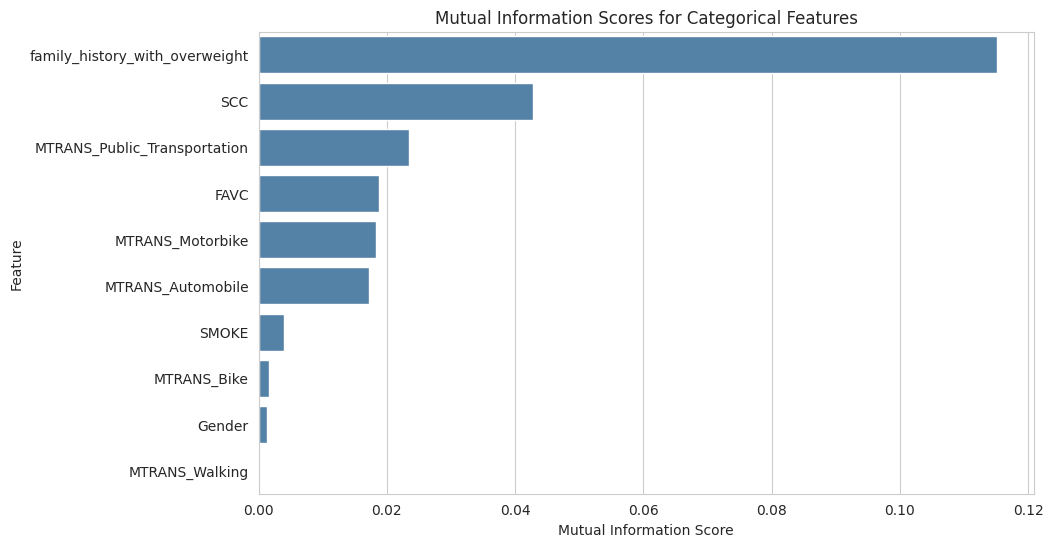

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style('whitegrid')

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='mi_score', y='feature', data=mi_df2, color='steelblue')
plt.title('Mutual Information Scores for Categorical Features')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.show()


Chi Square test

In [ ]:
from sklearn.feature_selection import chi2, SelectKBest

# feature selection
def chi2_select_features(X_train, y_train):
  # Set seed to 42
  np.random.seed(42)
  fs = SelectKBest(score_func=chi2, k='all')
  fs.fit(X_train, y_train)
  return fs

def chi2_transform(X_train, X_test, fs):
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs

fs1 = chi2_select_features(df_cat_train,y_train)

In [ ]:
# Create dataframe to store results
results_df = pd.DataFrame(columns=['Feature', 'Chi-Square Score'])

# Loop through each feature and store score
for i in range(len(df_cat_train.columns)):
    feature = df_cat_train.columns[i]
    score = fs1.scores_[i]
    results_df = pd.concat([results_df,
                            pd.DataFrame({'Feature': [feature],
                                                      'Chi-Square Score': [score]})])

# Sort results dataframe by Score column in descending order
results_df = results_df.sort_values(by='Chi-Square Score', ascending=False)

# Reset the index without adding the old index as a column
results_df = results_df.reset_index(drop=True)

# Print results dataframe
results_df

,Feature,Chi-Square Score
0,SCC,48.004206
1,family_history_with_overweight,44.030976
2,MTRANS_Walking,28.443725
3,FAVC,10.841120
4,MTRANS_Public_Transportation,1.500344
5,MTRANS_Bike,0.730571
6,MTRANS_Motorbike,0.406364
7,SMOKE,0.368793
8,Gender,0.100289
9,MTRANS_Automobile,0.005498


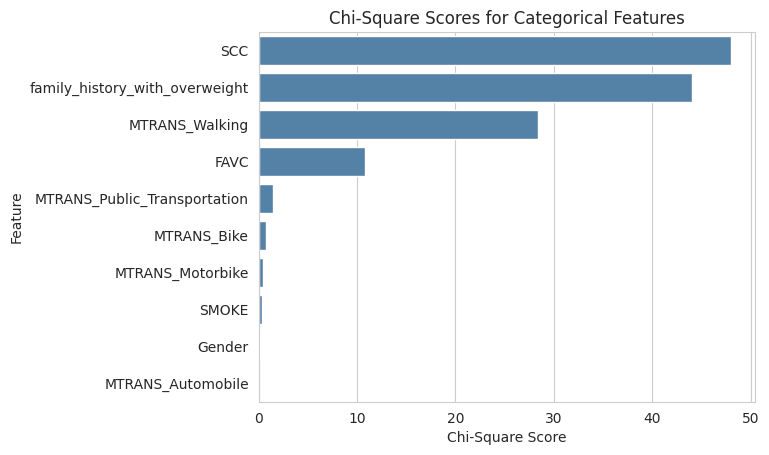

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style('whitegrid')

# Create the bar plot
sns.barplot(x='Chi-Square Score', y='Feature', data=results_df, color='steelblue')

# Add a title
plt.title('Chi-Square Scores for Categorical Features')

# Show the plot
plt.show()

Ordinal Variables

Mutual Information test

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information between each feature in X and y
mutual_info3 = mutual_info_classif(df_ord_train, y_train, random_state=42)

# Create a DataFrame to store the mutual information scores for each feature
mi_df3 = pd.DataFrame({'feature': ord_cols, 'mi_score': mutual_info3})

# Sort the features by their mutual information scores in descending order
mi_df3 = mi_df3.sort_values(by='mi_score', ascending=False)

# Print the mutual information scores for each feature
mi_df3

,feature,mi_score
2,CAEC,0.088327
0,FCVC,0.037081
6,CALC,0.029572
1,NCP,0.023040
4,FAF,0.008821
3,CH2O,0.006839
5,TUE,0.000892


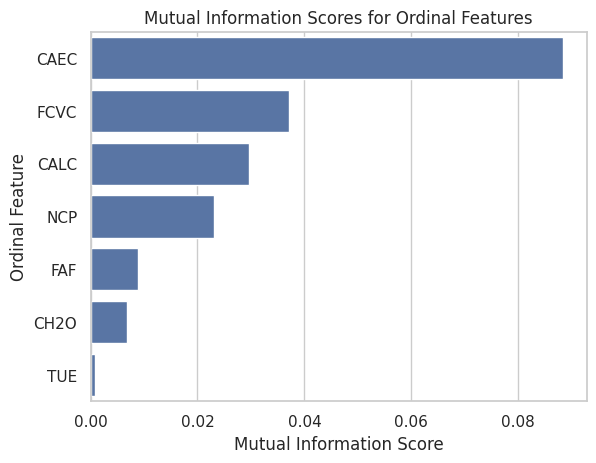

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Create a horizontal bar plot of mutual information scores
sns.barplot(x="mi_score", y="feature", data=mi_df3, color="b")

# Set the title and axes labels
plt.title("Mutual Information Scores for Ordinal Features")
plt.xlabel("Mutual Information Score")
plt.ylabel("Ordinal Feature")
plt.show()


Kendall Rank Test

In [ ]:
import pandas as pd
import scipy.stats as stats

# create a list of column names and their corresponding Kendall tau scores
kendall_tau = [stats.kendalltau(X_train[col], y_train)[0] for col in ord_cols]

# create a dataframe to store the results
kendall_df = pd.DataFrame({'Column': ord_cols, 'Kendall Tau': kendall_tau})

# sort the dataframe by the 'Kendall Tau' column in descending order
kendall_df = kendall_df.sort_values(by='Kendall Tau', ascending=False)

# print the sorted dataframe
kendall_df

,Column,Kendall Tau
0,FCVC,0.141176
6,CALC,0.086051
3,CH2O,0.065301
1,NCP,0.007853
5,TUE,-0.038171
4,FAF,-0.144986
2,CAEC,-0.251605


Text(0.5, 1.0, 'Kendall Tau Scores for Ordinal Variables')

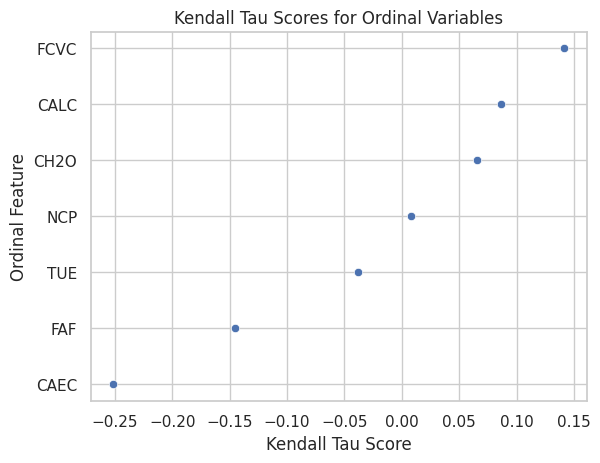

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# create the scatterplot
sns.scatterplot(data=kendall_df, x='Kendall Tau', y='Column')

# set the axis labels and title
plt.xlabel('Kendall Tau Score')
plt.ylabel('Ordinal Feature')
plt.title('Kendall Tau Scores for Ordinal Variables')

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# get all column names as a list
all_cols = X_train.columns.tolist()

# Compute mutual information between each feature in X and y
mutual_info4 = mutual_info_classif(X_train, y_train, random_state=42)

# Create a DataFrame to store the mutual information scores for each feature
mi_df4 = pd.DataFrame({'feature': all_cols, 'mi_score': mutual_info4})

# Sort the features by their mutual information scores in descending order
mi_df4 = mi_df4.sort_values(by='mi_score', ascending=False)

# Print the mutual information scores for each feature
mi_df4

,feature,mi_score
1,Age,0.199569
2,Height,0.141733
3,family_history_with_overweight,0.100172
7,CAEC,0.071428
6,NCP,0.043774
4,FAVC,0.043088
18,MTRANS_Walking,0.022430
10,SCC,0.021193
13,CALC,0.016300
11,FAF,0.016122


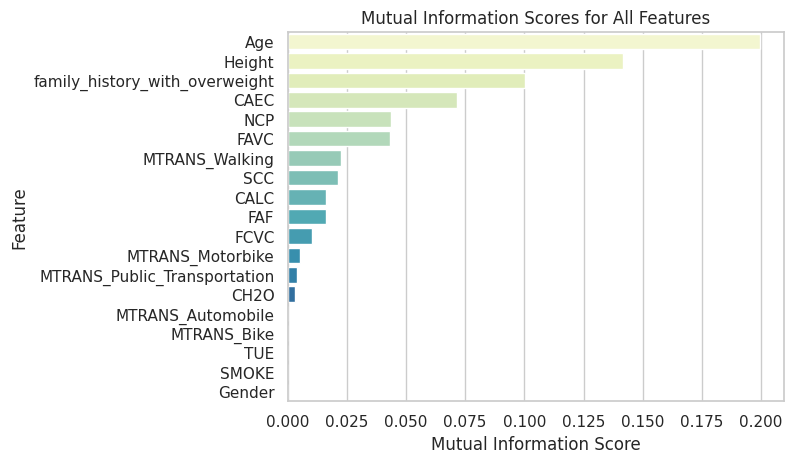

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set color palette
colors = sns.color_palette("YlGnBu", len(mi_df4))

# Create barplot using Seaborn
sns.set(style="whitegrid")
sns.barplot(x="mi_score", y="feature", data=mi_df4, palette=colors)

# Set plot title and labels
plt.title("Mutual Information Scores for All Features")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")

# Show plot
plt.show()



Get ready to drop gender, TUE from the list

In [ ]:
# Drop the following rows Gender and TUE 
X_train1 = X_train.drop(['Gender','TUE'], axis=1)

In [ ]:
# Drop the following rows
X_test1 = X_test.drop(['Gender','TUE'], axis=1)

In [ ]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 1930 to 860
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1477 non-null   float64
 1   Height                          1477 non-null   float64
 2   family_history_with_overweight  1477 non-null   int64  
 3   FAVC                            1477 non-null   int64  
 4   FCVC                            1477 non-null   float64
 5   NCP                             1477 non-null   object 
 6   CAEC                            1477 non-null   int64  
 7   SMOKE                           1477 non-null   int64  
 8   CH2O                            1477 non-null   object 
 9   SCC                             1477 non-null   int64  
 10  FAF                             1477 non-null   object 
 11  CALC                            1477 non-null   int64  
 12  MTRANS_Automobile               

In [ ]:
import os
# Export this x_train and x_test dataset as x_train_label and x_test_label
X_train1.to_csv(os.path.join('/content/drive/MyDrive/NUS/2022 2023 Sem 2/ST4248 Term Paper/Dataset/', 'x_train_hybrid.csv'), index=False)
X_test1.to_csv(os.path.join('/content/drive/MyDrive/NUS/2022 2023 Sem 2/ST4248 Term Paper/Dataset/', 'x_test_hybrid.csv'), index=False)

# Export this y_train and x_test dataset as y_train_label and y_test_label respectively
y_train.to_csv(os.path.join('/content/drive/MyDrive/NUS/2022 2023 Sem 2/ST4248 Term Paper/Dataset/', 'y_train_hybrid.csv'), index=False)
y_test.to_csv(os.path.join('/content/drive/MyDrive/NUS/2022 2023 Sem 2/ST4248 Term Paper/Dataset/', 'y_test_hybrid.csv'), index=False)